# Import and Data Wrangling

In [3]:
#import all necessary modules

import matplotlib.pyplot as plt
import collections
from collections import Counter
import numpy as np
import pandas as pd
import array as arr
import statistics as st
import scipy.stats as stats
from matplotlib import path
from collections import OrderedDict, defaultdict 
%matplotlib inline 

In [4]:
#Read the lunar and solar eclipse csv files
#NAN values replace '-'

lunar_file = pd.read_csv('./lunar.csv',index_col='Catalog Number',na_values='-')
solar_file = pd.read_csv('./solar.csv',index_col='Catalog Number',na_values='-')
                   

In [5]:
# Create a separate dataframes with the columns needed for analysis

lunar = lunar_file[['Calendar Date', 'Eclipse Time', 'Delta T (s)','Eclipse Type', 'Latitude', 'Longitude',
       'Penumbral Eclipse Duration (m)', 'Partial Eclipse Duration (m)','Total Eclipse Duration (m)']]
solar = solar_file[['Calendar Date', 'Eclipse Time', 'Delta T (s)', 'Eclipse Type','Eclipse Magnitude',
       'Latitude', 'Longitude', 'Sun Altitude', 'Sun Azimuth',
       'Path Width (km)', 'Central Duration']]

In [6]:
#create names to easily look at df heads while editing data
sh = solar.head()
lh = lunar.head()

In [7]:
#display lunar dataframe for reference
lh

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
Catalog Number,,,,,,,,,
1,-1999 June 26,14:13:28,46437,N,24S,22W,268.8,NaN,NaN
2,-1999 November 21,20:23:49,46427,N,15N,98W,233.4,NaN,NaN
3,-1998 May 17,05:47:36,46416,P,13S,89E,281.7,102.7,NaN
4,-1998 November 11,05:15:58,46404,P,12N,113E,343.4,200.8,NaN
5,-1997 May 6,18:57:01,46392,T+,11S,92W,322.8,213.5,98.2


In [8]:
#display solar dataframe for reference
sh

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
Catalog Number,,,,,,,,,,,
1,-1999 June 12,03:14:51,46438,T,1.0733,6.0N,33.3W,74,344,247.0,06m37s
2,-1999 December 5,23:45:23,46426,A,0.9382,32.9S,10.8E,76,21,236.0,06m44s
3,-1998 June 1,18:09:16,46415,T,1.0284,46.2N,83.4E,60,151,111.0,02m15s
4,-1998 November 25,05:57:03,46403,A,0.9806,67.8S,143.8W,25,74,162.0,01m14s
5,-1997 April 22,13:19:56,46393,P,0.1611,60.6S,106.4W,0,281,NaN,NaN


In [9]:
sh['Calendar Date']

Catalog Number
1        -1999 June 12
2     -1999 December 5
3         -1998 June 1
4    -1998 November 25
5       -1997 April 22
Name: Calendar Date, dtype: object

In [10]:
#['Calendar Date'] ->Solar and lunar eclipses during the five millennium period -1999 to +3000 (2000 BCE to 3000 CE).

#splitting the column 'Calendar Date' into a list of month, day, year for convenience
solar_dates = []
for date in solar['Calendar Date']:
    date = date.split()
    date[0] = int(date[0])
    date[2] = int(date[2])
    solar_dates.append(date)

lunar_dates = []
for date in lunar['Calendar Date']:
    date = date.split()
    date[0] = int(date[0])
    date[2] = int(date[2])
    lunar_dates.append(date)

#Replace the column in dataframe with the date list for each row : [year,month,day]
solar['Calendar Date'] = solar_dates
lunar['Calendar Date'] = lunar_dates


# Exploratory Data Analysis (EDA) : Data Storytelling/ Trend Analysis

Questions Asked:

1. Which eclipse is more common?
    - How many solar/lunar eclipses occur on average every year?
    
    
2. Is there a monthly trend for when solar/lunar eclipses occur?
    - Is it different for solar vs lunar eclipses?
    - If so why are they more/less common during certain months?
    
    
3. What months are total eclipses more common?
    - Does it differ for solar/lunar eclipses?
      

## Which eclipse is more common? How many solar/lunar eclipses per year on average?

There seem to be 166 more lunar eclipses than solar eclipses. After further investigation, it was found that on average solar and lunar eclipses had around 2 eclipses a year. There was no significant difference with solar eclipses (~2.3796/yr) and lunar eclipses (~2.4128/yr). But since this is over a 5 millennium period, the small difference can be seen affecting the total number of eclipses, that is that there have been more lunar than solar eclipses over this time frame 2000 BCE to 3000 CE.

In [11]:
print('Number of lunar eclipses in 5 milleniums = ', len(lunar))
print('Number of solar eclipses in 5 milleniums = ', len(solar))

print('Difference between solar and lunar eclipses = ', len(lunar) - len(solar))

Number of lunar eclipses in 5 milleniums =  12064
Number of solar eclipses in 5 milleniums =  11898
Difference between solar and lunar eclipses =  166


In [12]:
#extracting just the years into lists
solar_year = [date[0] for date in solar_dates]
lunar_year = [date[0] for date in lunar_dates]

#Make a dictionary of years and counts for solar and lunar eclipses
solar_year_count = dict(Counter(solar_year))
lunar_year_count = dict(Counter(lunar_year))

#convert the value counts to list to perform operations
solaryearvalues = list(solar_year_count.values())
lunaryearvalues = list(lunar_year_count.values())

#calculate and print the mean number of eclipses per year
print('Mean solar eclipses per year = ', np.mean(solaryearvalues))
print('Mean lunar eclipses per year = ', np.mean(lunaryearvalues))

Mean solar eclipses per year =  2.3796
Mean lunar eclipses per year =  2.4128


## Is there a monthly trend for when solar/lunar eclipses occur?
- Is it different for solar vs lunar eclipses?

    Solar and lunar eclipses seem to have relatively the same trend with every month as observed using data analysis plots.


- If so why are they more/less common during certain months?

    The trend seems directly correlated to how many days are in the month. More days in a month means more probability of an eclipse occurring during that month. That is why February seems to have the lowest number of eclipses since the month has the least number of days regardless of whether it is a leap year.

In [13]:
#extracting just the months into lists
solar_months = [date[1] for date in solar_dates]
lunar_months = [date[1] for date in lunar_dates]

#Make a dictionary of {month:counts} for solar and lunar eclipses
solar_months_count = dict(Counter(solar_months))
lunar_months_count = dict(Counter(lunar_months))

#Make dataframes for better visual table analysis
solar_months_df = pd.DataFrame.from_dict(solar_months_count, orient='index',columns=['Solar Month Count'])
lunar_months_df = pd.DataFrame.from_dict(lunar_months_count, orient='index',columns=['Lunar Month Count'])

#print the counts for observation
print(solar_months_df)
print(lunar_months_df)

           Solar Month Count
June                     973
December                1014
November                 977
April                    981
May                     1009
October                 1008
March                   1009
September                982
February                 919
August                  1008
January                 1010
July                    1008
           Lunar Month Count
June                     992
November                 994
May                     1025
October                 1022
April                    986
March                   1028
September                990
August                  1015
February                 936
January                 1027
December                1024
July                    1025


In [14]:
#defined a list of the months in order
months = ['January', 'February', 'March','April','May','June','July','August','September','October','November','December']

#create an ordered dictionary that reorders the previous dictionaries based on month list
solar_months_ordered = OrderedDict(sorted(solar_months_count.items(),key =lambda x:months.index(x[0])))
lunar_months_ordered = OrderedDict(sorted(lunar_months_count.items(),key =lambda x:months.index(x[0])))

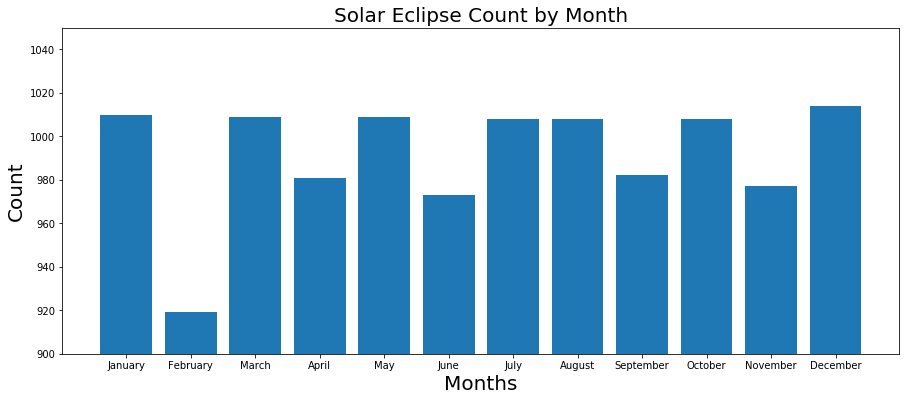

In [15]:
#Plot the counts of solar eclipses for months 
_ = plt.figure(figsize=(15,6))

_ = plt.bar(solar_months_ordered.keys(), solar_months_ordered.values())
_ = plt.ylim(900,1050)
_ = plt.rcParams['xtick.labelsize']=11
_ = plt.rcParams['ytick.labelsize']=12
_ = plt.xlabel('Months',size=20)
_ = plt.ylabel('Count',size=20)
_ = plt.title('Solar Eclipse Count by Month',size=20)
_ = plt.savefig('SolarMonthCount.png')
_ = plt.show() 

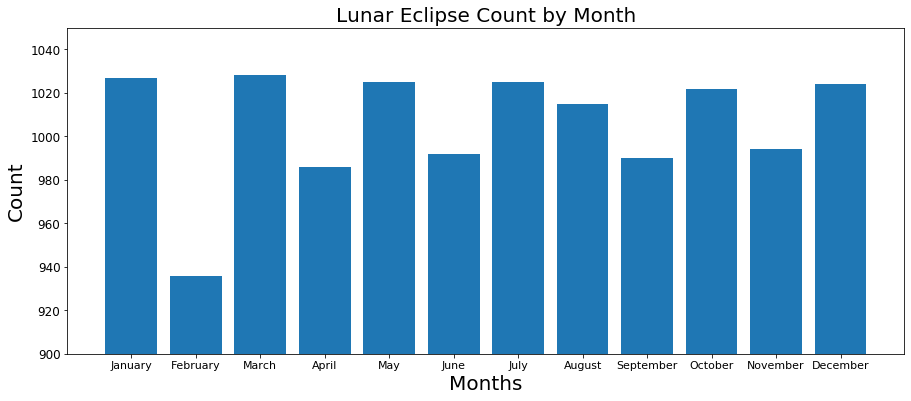

In [16]:
#Plot the counts of lunar eclipses for months 
_ = plt.figure(figsize=(15,6))

_ = plt.bar(lunar_months_ordered.keys(), lunar_months_ordered.values())
_ = plt.ylim(900,1050)
_ = plt.rcParams['xtick.labelsize']=11
_ = plt.rcParams['ytick.labelsize']=12
_ = plt.xlabel('Months',size=20)
_ = plt.ylabel('Count',size=20)
_ = plt.title('Lunar Eclipse Count by Month',size=20)
_ = plt.savefig('LunarMonthCount.png')
_ = plt.show() 

## What months are total eclipses more common?

Since there are many types of eclipses, I want to focus on one type of eclipse. I will be focusing on a total eclipse for both lunar and solar eclipses. A total solar eclipse is characterized by the moon completely covering the sun in the sky. A total lunar eclipse is when the Earth's shadow completely covers the moon.

After analysis, I first found that there have been a few hundred more total lunar eclipses than solar eclipses in the past 5 millenniums. This implies that total lunar eclipses are more common.

- Does the trend differ between lunar and solar eclipses?

    Total lunar eclipses seemed the follow the monthly trend that was seen earlier, where the number of eclipses was directly related to the number of days.

    Total solar eclipses, however, seem to veer off this trend greatly. They seem to be more common during the second half of the year during the season's Fall and Winter (September - January). This will be an area of further study using statistical testing to test whether month plays a role in the probability of a solar eclipse occurring.

In [17]:
#make a empty list of total solar eclipses
solar_type = []

#if the 'Eclipse Type' column has T, then append to the list
for i in solar['Eclipse Type']:
    if i is 'T':
        solar_type.append([i])

#see how many total solar eclipses
print('Number of total solar eclipses =', len(solar_type))

Number of total solar eclipses = 3049


In [18]:
#make an empty list of total eclipses
lunar_type = []

#if the value is not NaN in 'Total Eclipse Duration' then append to the new list
for i in lunar['Total Eclipse Duration (m)']:
    if str(i) != 'nan':
        lunar_type.append([i])

#see how many total lunar eclipses
print('Number of total lunar eclipses =',len(lunar_type))

Number of total lunar eclipses = 3479


In [19]:
#Create df with columns needed for analysis
solar_type = solar[['Calendar Date','Eclipse Type']]
lunar_type = lunar[['Calendar Date','Total Eclipse Duration (m)']]

In [20]:
#create df of solar eclipses with only total eclipses by keeping rows with 'T' in the column 'Eclipse Type'
total_solar = solar.loc[solar['Eclipse Type'] == 'T']

#double check length to be the same as number of total solar eclipses
print(len(total_solar))
print(len(solar_type))

3049
11898


In [21]:
#print the df head for visual analysis 
total_solar.head(3)

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
Catalog Number,,,,,,,,,,,
1,"[-1999, June, 12]",03:14:51,46438,T,1.0733,6.0N,33.3W,74,344,247.0,06m37s
3,"[-1998, June, 1]",18:09:16,46415,T,1.0284,46.2N,83.4E,60,151,111.0,02m15s
10,"[-1996, October, 4]",23:23:37,46358,T,1.0257,28.8N,38.6E,59,214,101.0,02m04s


In [22]:
#create df of lunar eclipses with only total eclipses by dropping rows that have Nans in the column
    #'Total Eclipse Duration (m)'

total_lunar = lunar.dropna(subset=['Total Eclipse Duration (m)'])

#double check length to be the same as number of total solar eclipses
print(len(total_lunar))
print(len(lunar_type))

3479
12064


In [23]:
#print the df head for visual analysis 
total_lunar.head(3)

,Calendar Date,Eclipse Time,Delta T (s),Eclipse Type,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
Catalog Number,,,,,,,,,
5,"[-1997, May, 6]",18:57:01,46392,T+,11S,92W,322.8,213.5,98.2
6,"[-1997, October, 31]",06:54:09,46380,T+,9N,88E,374.4,228.7,90.6
15,"[-1993, February, 23]",02:59:48,46300,T-,16N,153E,371.8,228.2,87.7


In [24]:
#create a dictionary using a counter for the months where the total lunar eclipses occur
total_lunar_months = dict(Counter([date[1] for date in total_lunar['Calendar Date']]))

In [25]:
#print dict for analysis
total_lunar_months

{'May': 297,
 'October': 290,
 'February': 260,
 'August': 299,
 'December': 290,
 'June': 294,
 'April': 290,
 'September': 285,
 'January': 296,
 'July': 301,
 'November': 286,
 'March': 291}

In [26]:
#create a dictionary using a counter for the months where the total solar eclipses occur
total_solar_months = dict(Counter([date[1] for date in total_solar['Calendar Date']]))

In [27]:
#print dict for analysis
total_solar_months

{'June': 295,
 'October': 225,
 'March': 274,
 'January': 220,
 'July': 297,
 'November': 203,
 'February': 216,
 'April': 283,
 'August': 287,
 'December': 213,
 'May': 296,
 'September': 240}

In [28]:
#create an ordered dictionary that reorders the previous dictionaries based on month list
total_solar_months_ordered = OrderedDict(sorted(total_solar_months.items(),key =lambda x:months.index(x[0])))
total_lunar_months_ordered = OrderedDict(sorted(total_lunar_months.items(),key =lambda x:months.index(x[0])))

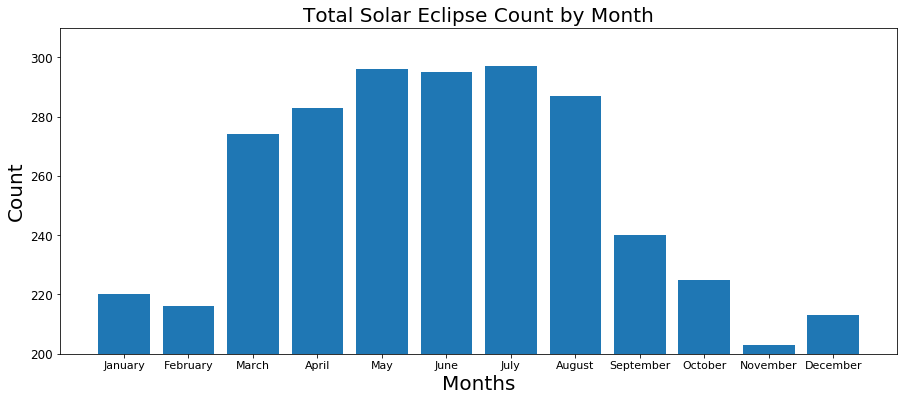

In [29]:
#Plot the counts of solar eclipses for months in order
_ = plt.figure(figsize=(15,6))

_ = plt.bar(total_solar_months_ordered.keys(), total_solar_months_ordered.values())
_ = plt.ylim(200,310)
_ = plt.rcParams['xtick.labelsize']=11
_ = plt.rcParams['ytick.labelsize']=12
_ = plt.xlabel('Months',size=20)
_ = plt.ylabel('Count',size=20)
_ = plt.title('Total Solar Eclipse Count by Month',size=20)
_ = plt.savefig('TotalSolarCount.png')
_ = plt.show() 

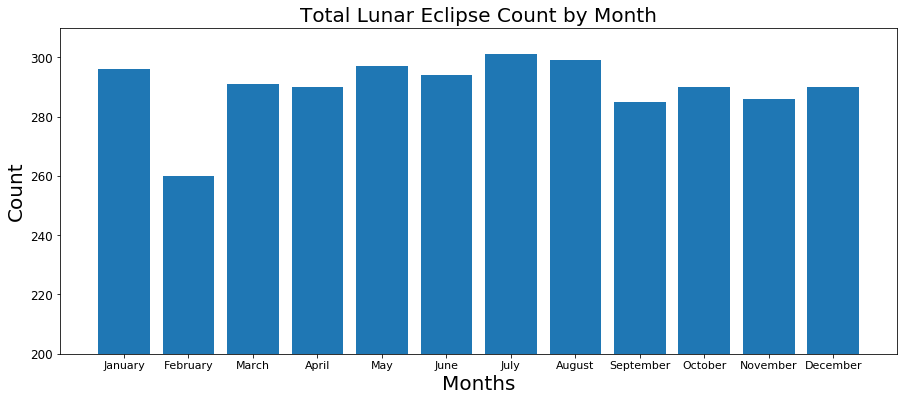

In [30]:
#Plot the counts of lunar eclipses for months in order
_ = plt.figure(figsize=(15,6))

_ = plt.bar(total_lunar_months_ordered.keys(), total_lunar_months_ordered.values())
_ = plt.ylim(200,310)
_ = plt.rcParams['xtick.labelsize']=11
_ = plt.rcParams['ytick.labelsize']=12
_ = plt.xlabel('Months',size=20)
_ = plt.ylabel('Count',size=20)
_ = plt.title('Total Lunar Eclipse Count by Month',size=20)
_ = plt.savefig('TotalLunarCount.png')
_ = plt.show()

# Exploratory Data Analysis (EDA): Statistical Analysis Part 1 

## Solar Eclipses

In [31]:
#group 1: fall-winter [septemeber -> february], group 2: spring-summer [march -> august]
group1_months = ['September', 'October', 'November', 'December', 'January', 'February']
group2_months = ['March', 'April', 'May', 'June', 'July', 'August']

#Create dictionaries of group 1 and group 2 data 
group1_total_solar_eclipse_dict = defaultdict(int)
group2_total_solar_eclipse_dict = defaultdict(int)


#Iterate over solar eclipse df and create dictionaries for each group: 
for ind, row in solar.iterrows():
   
    # create the key to be the year, month of the date the eclipse occured
    year, month = row['Calendar Date'][0], row['Calendar Date'][1]
    dict_key = (year, month)
    
    #append values dictionary for group 1: total eclipse is 1 else 0
    if month in group1_months:
        if row['Eclipse Type'] == 'T':
            group1_total_solar_eclipse_dict[dict_key] += 1
        else:
            group1_total_solar_eclipse_dict[dict_key] += 0
            
    #append values dictionary for group 2: total eclipse is 1 else 0
    else:
        if row['Eclipse Type'] == 'T':
            group2_total_solar_eclipse_dict[dict_key] += 1
        else:
            group2_total_solar_eclipse_dict[dict_key] += 0


In [32]:
#length of group 1 and 2 (sample size: n)
solar_n1 = len(group1_total_solar_eclipse_dict.values())
solar_n2 = len(group2_total_solar_eclipse_dict.values())

#probability of total eclipse in group 1 and 2: p1 and p2
solar_p1 = float(sum(group1_total_solar_eclipse_dict.values()) / solar_n1)
solar_p2 = float(sum(group2_total_solar_eclipse_dict.values()) / solar_n2)

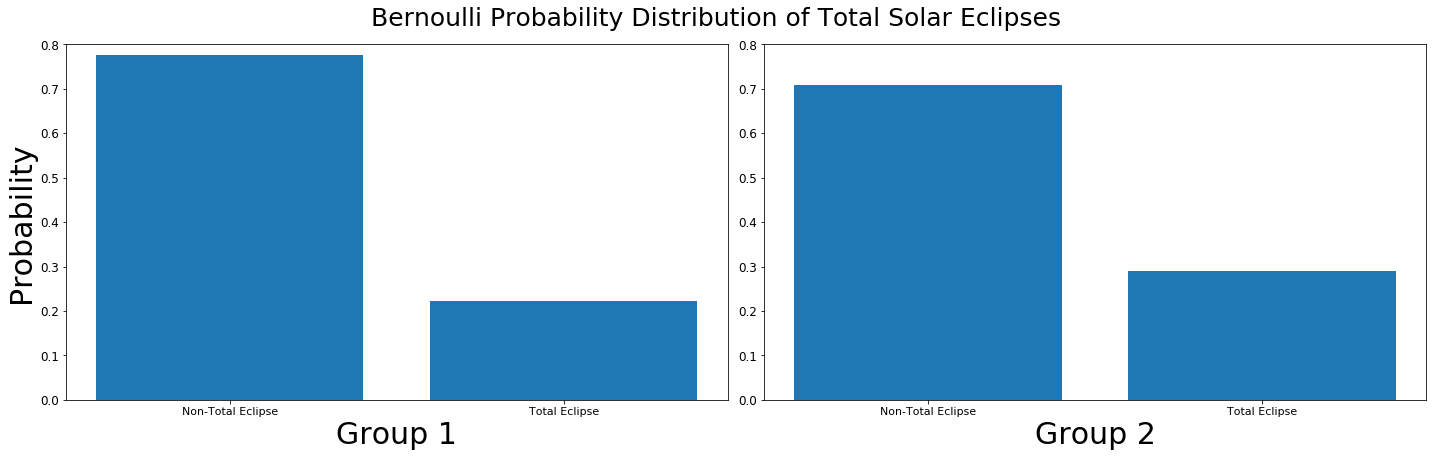

In [33]:
_ = plt.rcParams['figure.figsize'] = 20,6 

#Plot on the left
_ = plt.subplot(1, 2, 1)
_ = plt.bar(['Non-Total Eclipse', 'Total Eclipse'], [1-solar_p1,solar_p1])
_ = plt.xlabel('Group 1', size=30)
_ = plt.ylabel('Probability',size=30)
_ = plt.ylim(0,0.8)

#plot on the right
_ = plt.subplot(1, 2, 2)
_ = plt.bar(['Non-Total Eclipse', 'Total Eclipse'], [1-solar_p2,solar_p2])
_ = plt.xlabel('Group 2',size=30 )
_ = plt.ylim(0,0.8)

#edits the sizing of both plots
_ = plt.tight_layout()
_ = plt.rcParams['xtick.labelsize']=15
_ = plt.rcParams['ytick.labelsize']=20
_ = plt.suptitle('Bernoulli Probability Distribution of Total Solar Eclipses',size = 25,y=1.05)
_ = plt.savefig('TotalSolar.png')
_ = plt.show()

In [34]:
#compute the standard deviations of each group 
solar_sigma1 = np.sqrt(solar_p1 * (1-solar_p1) / solar_n1)
solar_sigma2 = np.sqrt(solar_p2 * (1-solar_p2) / solar_n2)

#calculate the standard deviation difference 
solar_sigma_diff = np.sqrt((solar_sigma1**2) + (solar_sigma2**2))

#for 95% confidence interval, we use the critical Z-value of 1.96
z_value = 1.96

#calculate the margin of error for frequential test: critical z-value * std
solar_margin_error = z_value * solar_sigma_diff
print ('margin of error = ', solar_margin_error)

#Find a confidence interval of 95% for frequential test: mean +/- margin or error
solar_conf_interval = np.array([-1, +1]) * solar_margin_error
print('confidence interval = ',solar_conf_interval)

#Print actual proportion difference
solar_p1_p2 = solar_p1-solar_p2
print ('p_1 - p_2 = ', solar_p1_p2)

margin of error =  0.01568255159230949
confidence interval =  [-0.01568255  0.01568255]
p_1 - p_2 =  -0.06719435763444165


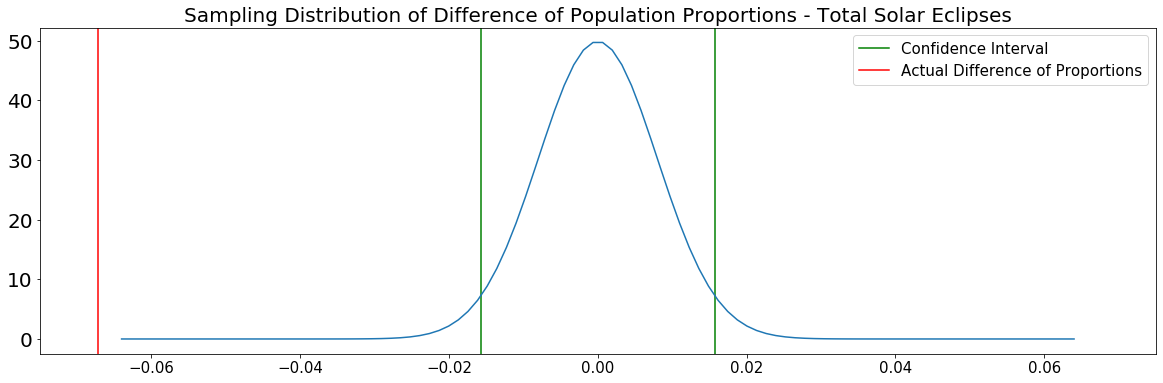

In [35]:
#create a plot displaying the sampling distribution for visual analysis
x= np.linspace(0-8*solar_sigma_diff, 0+8*solar_sigma_diff,100)
plt.axvline(x=solar_margin_error, color='g', label ='Confidence Interval')
plt.axvline(x=-solar_margin_error,color='g')
plt.axvline(x=solar_p1_p2,color='r',label='Actual Difference of Proportions')
plt.plot(x,stats.norm.pdf(x,0,solar_sigma_diff))
plt.xlim(-0.075,0.075)
plt.title('Sampling Distribution of Difference of Population Proportions - Total Solar Eclipses',size=20)
plt.legend(fontsize=15)
plt.savefig('SolarDist.png')
plt.show()

As seen above, the actual difference in proportions is outside the confidence interval range. Therefore we can reject the null hypothesis which states that the total solar eclipse has the same probability of occuring in both month groups.

## Lunar Eclipses

In [36]:
#group 1: fall-winter [septemeber -> february], group 2: spring-summer [march -> august]
group1_months = ['September', 'October', 'November', 'December', 'January', 'February']
group2_months = ['March', 'April', 'May', 'June', 'July', 'August']

#Create dictionaries of group 1 and group 2 data 
group1_total_lunar_eclipse_dict = defaultdict(int)
group2_total_lunar_eclipse_dict = defaultdict(int)


#Iterate over lunar eclipse df and create dictionaries for each group: 
for ind, row in lunar.iterrows():
   
    # create the key to be the year, month of the date the eclipse occured
    year, month = row['Calendar Date'][0], row['Calendar Date'][1]
    dict_key = (year, month)
    
    #append values dictionary for group 1: total eclipse is 1 else 0
    if month in group1_months:
        if row['Eclipse Type'] == 'T':
            group1_total_lunar_eclipse_dict[dict_key] += 1
        else:
            group1_total_lunar_eclipse_dict[dict_key] += 0
            
    #append values dictionary for group 2: total eclipse is 1 else 0
    else:
        if row['Eclipse Type'] == 'T':
            group2_total_lunar_eclipse_dict[dict_key] += 1
        else:
            group2_total_lunar_eclipse_dict[dict_key] += 0


In [37]:
#length of group 1 and 2 (sample size: n)
lunar_n1 = len(group1_total_lunar_eclipse_dict.values())
lunar_n2 = len(group2_total_lunar_eclipse_dict.values())

#probability of total eclipse in group 1 and 2: p1 and p2
lunar_p1 = float(sum(group1_total_lunar_eclipse_dict.values()) / lunar_n1)
lunar_p2 = float(sum(group2_total_lunar_eclipse_dict.values()) / lunar_n2)

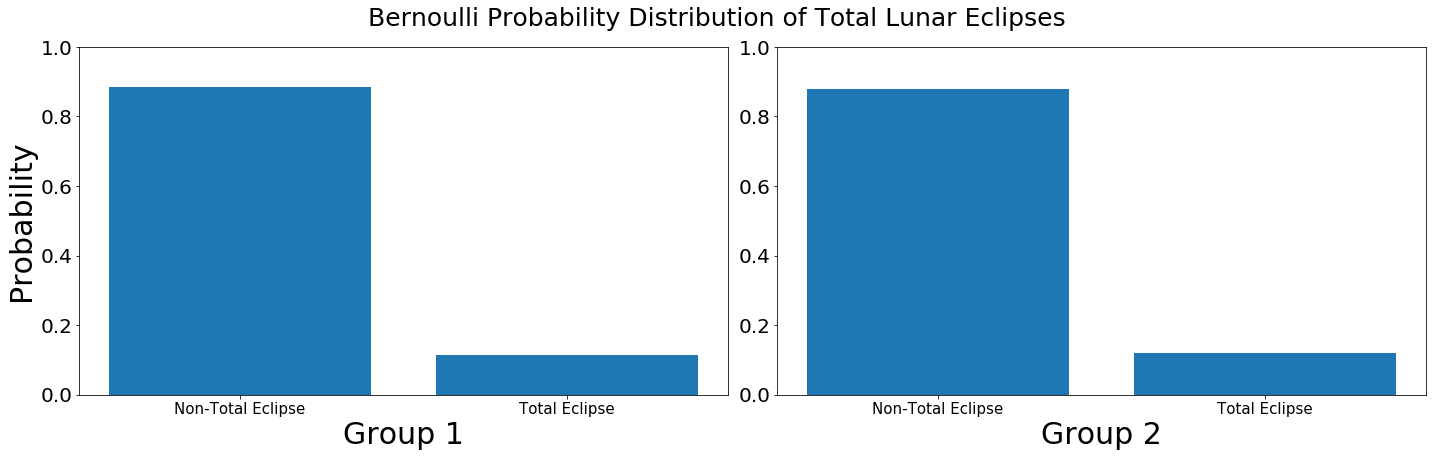

In [38]:
_ = plt.rcParams['figure.figsize'] = 20,6 

#Plot on the left
_ = plt.subplot(1, 2, 1)
_ = plt.bar(['Non-Total Eclipse', 'Total Eclipse'], [1-lunar_p1,lunar_p1])
_ = plt.xlabel('Group 1', size=30)
_ = plt.ylabel('Probability',size=30)
_ = plt.ylim(0,1)

#plot on the right
_ = plt.subplot(1, 2, 2)
_ = plt.bar(['Non-Total Eclipse', 'Total Eclipse'], [1-lunar_p2,lunar_p2])
_ = plt.xlabel('Group 2',size=30)
_ = plt.ylim(0,1)

#edits the sizing of both plots
_ = plt.tight_layout()
_ = plt.rcParams['xtick.labelsize']=15
_ = plt.rcParams['ytick.labelsize']=20
_ = plt.suptitle('Bernoulli Probability Distribution of Total Lunar Eclipses',size = 25,y=1.05)
_ = plt.savefig('TotalLunar.png')
_ = plt.show()

In [39]:
#compute the standard deviations of each group 
lunar_sigma1 = np.sqrt(lunar_p1 * (1-lunar_p1) / lunar_n1)
lunar_sigma2 = np.sqrt(lunar_p2 * (1-lunar_p2) / lunar_n2)

#calculate the standard deviation difference 
lunar_sigma_diff = np.sqrt((lunar_sigma1**2) + (lunar_sigma2**2))

#for 95% confidence interval, we use the critical Z-value of 1.96
z_value = 1.96

#calculate the margin of error for frequential test: critical z-value * std
lunar_margin_error = z_value * lunar_sigma_diff
print ('margin of error = ', lunar_margin_error)

#Find a confidence interval of 95% for frequential test: mean +/- margin or error
lunar_conf_interval = np.array([-1, +1]) * lunar_margin_error
print('confidence interval = ',lunar_conf_interval)

#Print actual proportion difference
lunar_p1_p2 = lunar_p1-lunar_p2
print ('p_1 - p_2 = ', lunar_p1_p2)

margin of error =  0.011497635354007652
confidence interval =  [-0.01149764  0.01149764]
p_1 - p_2 =  -0.005601561775998562


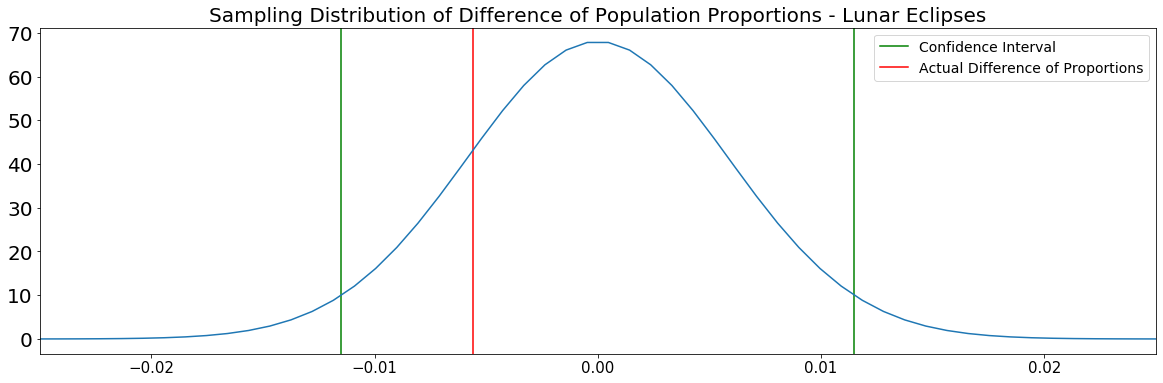

In [40]:
#create a plot displaying the sampling distribution for visual analysis
x= np.linspace(0-8*lunar_sigma_diff, 0+8*lunar_sigma_diff,100)
plt.axvline(x=lunar_margin_error, color='g', label ='Confidence Interval')
plt.axvline(x=-lunar_margin_error,color='g')
plt.axvline(x=lunar_p1_p2,color='r',label='Actual Difference of Proportions')
plt.plot(x,stats.norm.pdf(x,0,lunar_sigma_diff))
plt.xlim(-0.025,0.025)
plt.title('Sampling Distribution of Difference of Population Proportions - Lunar Eclipses',size=20)
plt.legend(fontsize=14)
plt.savefig('LunarDist.png')
plt.show()

As seen above, the actual difference in proportions is inside the confidence interval range. Therefore we cannot reject the null hypothesis which states that the total lunar eclipse has the same probability of occuring in both month groups.

# Machine Learning : Predictive Analysis 

## Linear Regression - minus the error

Results: Solar rmse = 3.56 yrs 
         lunar rmse = 3.43 yrs

In [41]:
import datetime

#Create a linear regression format for the data

def get_linreg_format(df):
    x = []
    y = []

    for index, date in df['Calendar Date'].items():
        x.append(index)
        y.append(datetime.datetime.strptime(str(date[0] + 3000) + ' ' + str(date[1]) + ' ' + str(date[2]), '%Y %B %d'))
    
    #create arrays for x : eclipse index and y:years from start date
    start_date = y[0]
    for index in range(len(y)):
        temp = y[index] - start_date
        y[index] = float(temp.days/365)
    #print(x[:100])
    #print(y[:100])
    x = np.asarray(x)
    y = np.asarray(y)
    return x, y

#create the x,y values for solar eclipses
x_solar, y_solar = get_linreg_format(total_solar)

In [42]:
# print(x_solar)
# print(y_solar)
# print(x_solar)
# print(y_predicted)
# print(type())

### Actual data plot -solar eclipse

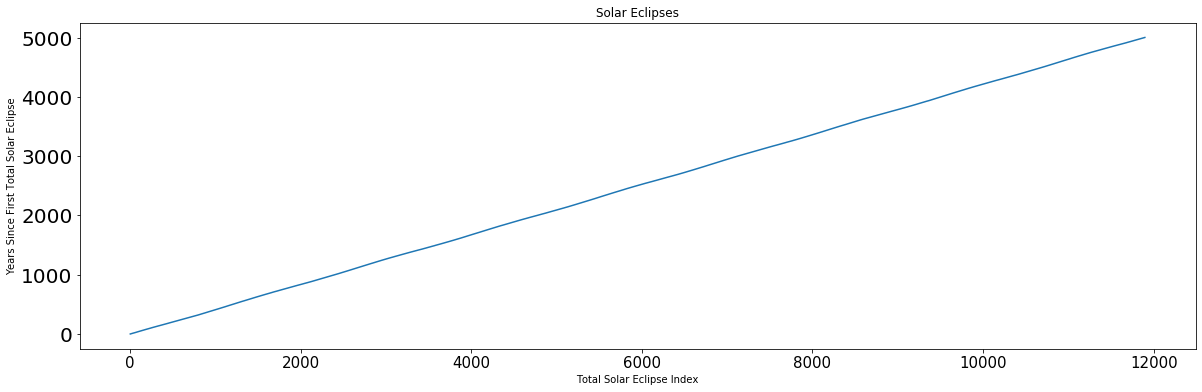

In [43]:
#plot the actual data 
_ = plt.plot(x_solar, y_solar)
_ = plt.xlabel('Total Solar Eclipse Index')
_ = plt.ylabel('Years Since First Total Solar Eclipse')
_ = plt.title('Solar Eclipses')
_ = plt.show()

### predicted Linear Regression Plot-solar

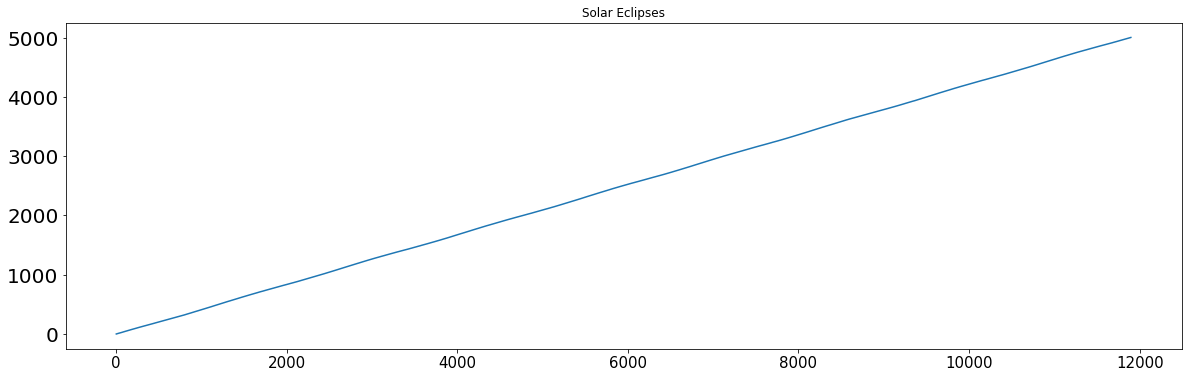

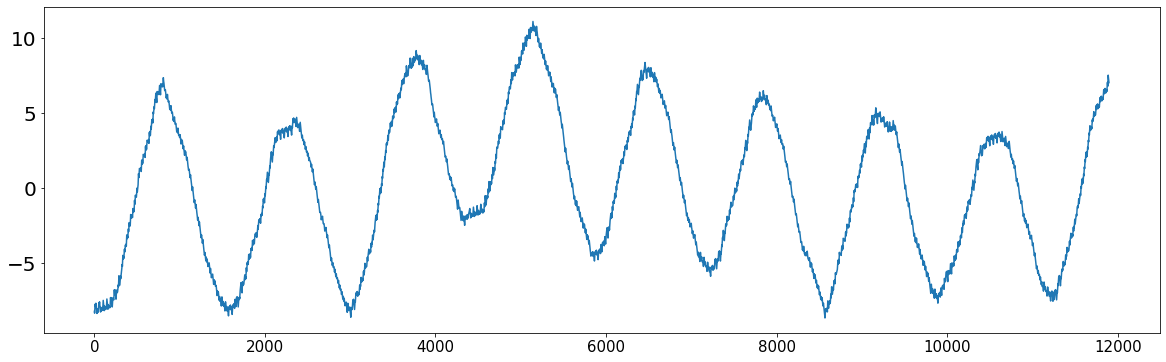

Root MSE:  4.939942254188271
MSE:  24.403029474714696


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#create Linear Regression model
lr_solar = LinearRegression()

#fit the model to the solar eclipse data
lr_solar.fit(x_solar.reshape(-1, 1), y_solar)

#predict the eclipses
y_predicted = lr_solar.predict(x_solar.reshape(-1, 1))

#compute difference between predicted and actual
y_diff = y_predicted - y_solar


#plots the predicted data with x:star index, and y:years from start date
_ = plt.plot(x_solar, y_solar)
_ = plt.title('Solar Eclipses')
_ = plt.show()
import math

#plots the difference between the predicted and actual
_ = plt.plot(x_solar, y_diff)
#cos_x = [-10 * math.cos(val/180) for val in x_solar]
#_ = plt.plot(x_solar, cos_x)
_ = plt.show()

print('Root MSE: ', np.sqrt(mean_squared_error(y_solar, y_predicted)))
print('MSE: ', mean_squared_error(y_solar, y_predicted))

#y_predicted_new = y_predicted - cos_x
#_ = plt.plot(x_solar, y_predicted_new)
#print('MSE: ', mean_squared_error(y_solar, y_predicted_new))



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


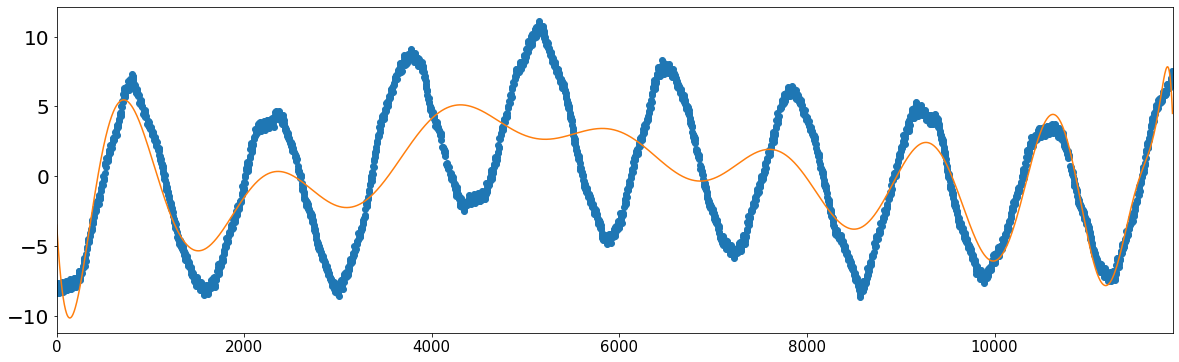

Root MSE:  3.5663218013757425
MSE:  12.71865119096792


In [45]:
z = np.polyfit(x_solar, y_diff, 40)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x_solar[0], x_solar[-1], len(x_solar))
y_new = f(x_new)

plt.plot(x_solar, y_diff, 'o', x_new, y_new)
plt.xlim([x_solar[0]-1, x_solar[-1] + 1 ])
plt.show()

y_predicted_new = y_predicted - y_new
print('Root MSE: ',np.sqrt(mean_squared_error(y_solar, y_predicted_new)))
print('MSE: ',mean_squared_error(y_solar, y_predicted_new))

In [46]:
# from scipy import optimize

# def test_func(x, a, b):
#     return a * np.cos(b/x)

# params, params_covariance = optimize.curve_fit(test_func, x_solar, y_diff, p0=[2, 2])
# print(params)

# plt.plot(x_solar, y_diff)
# plt.plot(x_solar, test_func(x_solar, params[0], params[1]))
# plt.show()

### actual lunar plot

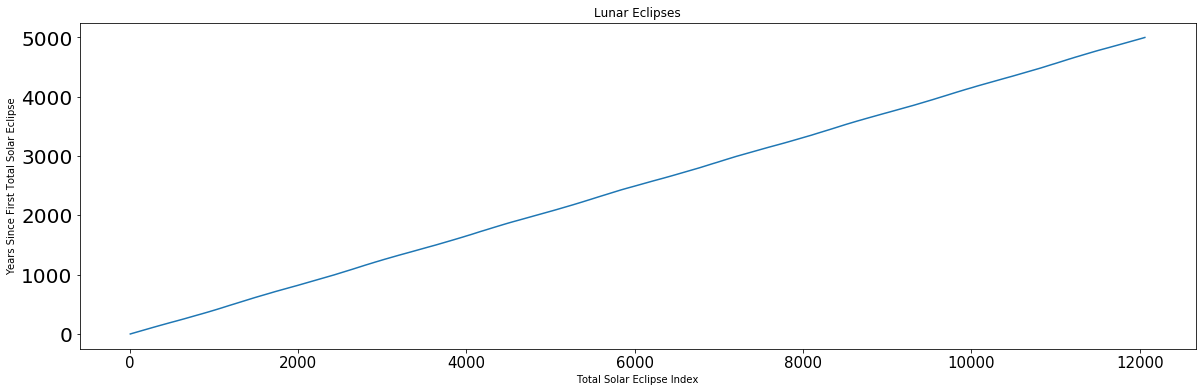

In [47]:
#plots the actual lunar eclipse data

x_lunar, y_lunar = get_linreg_format(total_lunar)

_ = plt.plot(x_lunar, y_lunar)
_ = plt.xlabel('Total Solar Eclipse Index')
_ = plt.ylabel('Years Since First Total Solar Eclipse')
_ = plt.title('Lunar Eclipses')
_ = plt.show()

### predicted linear regression -lunar

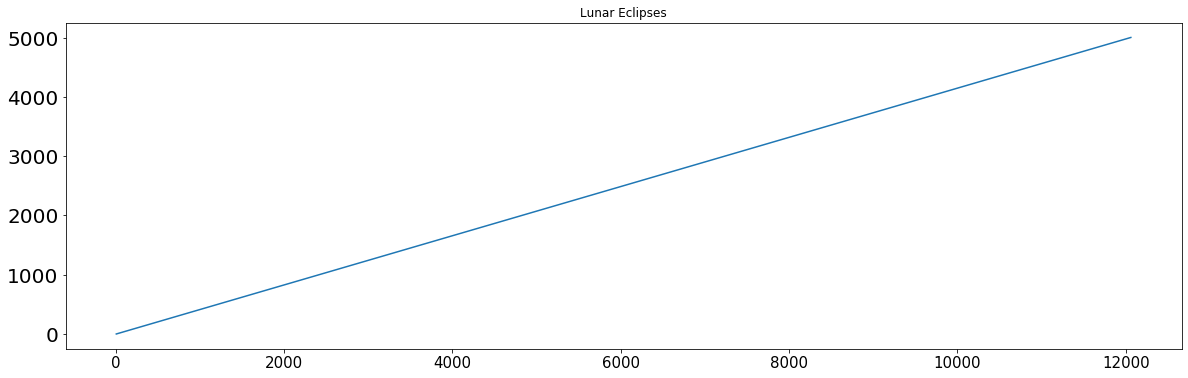

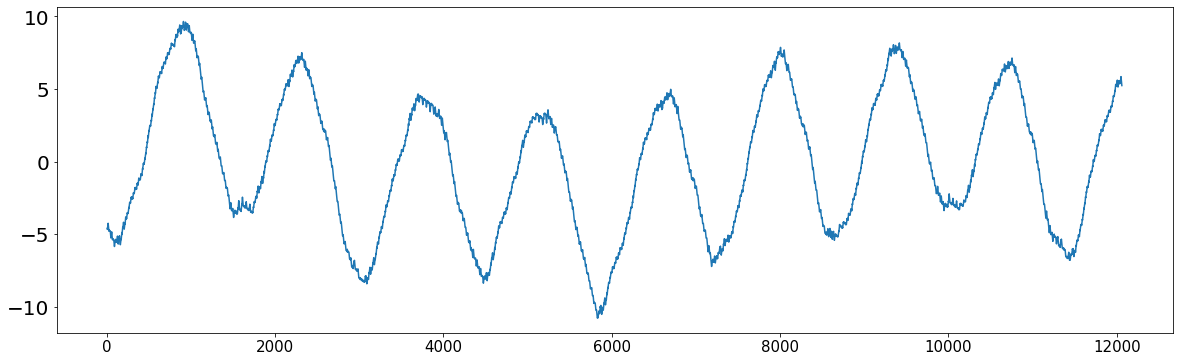

Root MSE:  4.672202894917946
MSE:  21.82947989127964


In [48]:
from sklearn.linear_model import LinearRegression

#create linear regression model
lr_lunar = LinearRegression()

#fit the model
lr_lunar.fit(x_lunar.reshape(-1, 1), y_lunar)

#predict 
y_predicted_lunar = lr_lunar.predict(x_lunar.reshape(-1, 1))

#compute difference between predicted and actual
y_diff_lunar = y_predicted_lunar - y_lunar


#plot the predicted data
_ = plt.plot(x_lunar, y_predicted_lunar)
_ = plt.title('Lunar Eclipses')
_ = plt.show()

#plots differnce between predicted and actual
_ = plt.plot(x_lunar, y_diff_lunar)
_ = plt.show()

print('Root MSE: ',np.sqrt(mean_squared_error(y_lunar, y_predicted_lunar)))
print('MSE: ', mean_squared_error(y_lunar, y_predicted_lunar))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


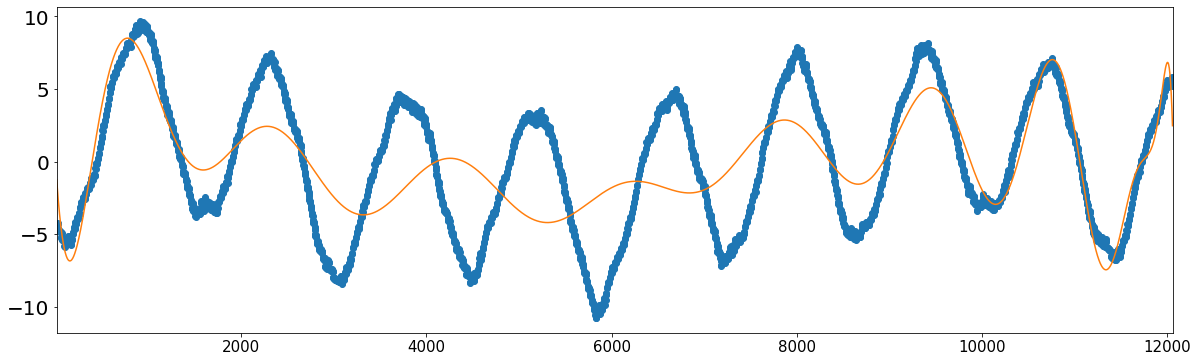

MSE:  11.824361376514661
Root MSE:  3.4386569146273755


In [49]:
z = np.polyfit(x_lunar, y_diff_lunar, 40)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x_lunar[0], x_lunar[-1], len(x_lunar))
y_new = f(x_new)

plt.plot(x_lunar, y_diff_lunar, 'o', x_new, y_new)
plt.xlim([x_lunar[0]-1, x_lunar[-1] + 1 ])
plt.show()

y_predicted_new = y_predicted_lunar - y_new
print('MSE: ', mean_squared_error(y_lunar, y_predicted_new))
print('Root MSE: ',np.sqrt(mean_squared_error(y_lunar, y_predicted_new)))

In [50]:
#try polynomial regression
#ridge regression,lasso regression
#set parameters with grid search
#cross validation
#bayesian regression

## Polynomial regression 

Results: solar rmse = 4.7 lunar = 4.57

### Solar

degree:  0
rmse=  1444.8533146245693
r2 =  0.0
degree:  1
rmse=  4.939942254188273
r2 =  0.9999883104921407
degree:  2
rmse=  4.763633730087695
r2 =  0.9999891300084552
degree:  3
rmse=  4.689554370170347
r2 =  0.9999894654586153
degree:  4
rmse=  4.6060809408396395
r2 =  0.9999898371477072
degree:  5
rmse=  41.600067002585114
r2 =  0.999171026699511
degree:  6
rmse=  103.1104643771796
r2 =  0.9949071842029126
degree:  7
rmse=  170.81304186449586
r2 =  0.9860236252701352
degree:  8
rmse=  238.15785236437893
r2 =  0.9728304595060917
degree:  9
rmse=  302.91628291357074
r2 =  0.9560460691365703
Best Degree:  4 
 Best R2:  0.9999898371477072 
 Best RMSE:  4.6060809408396395


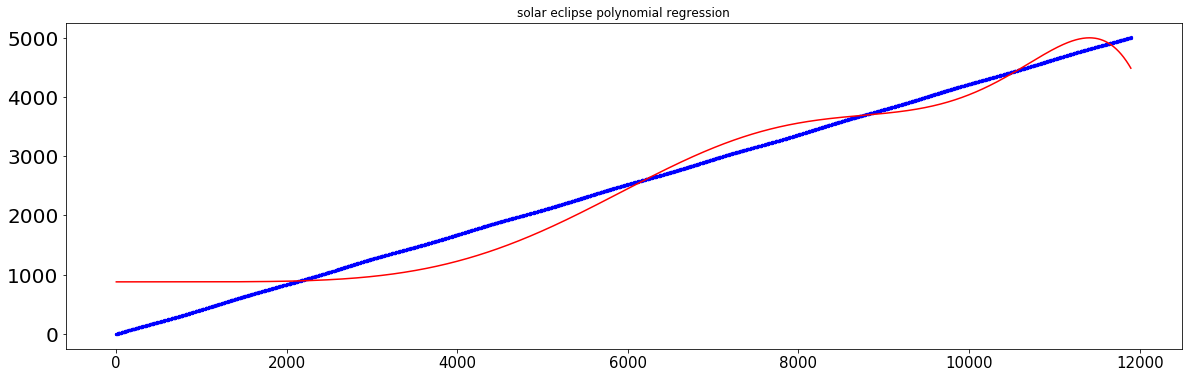

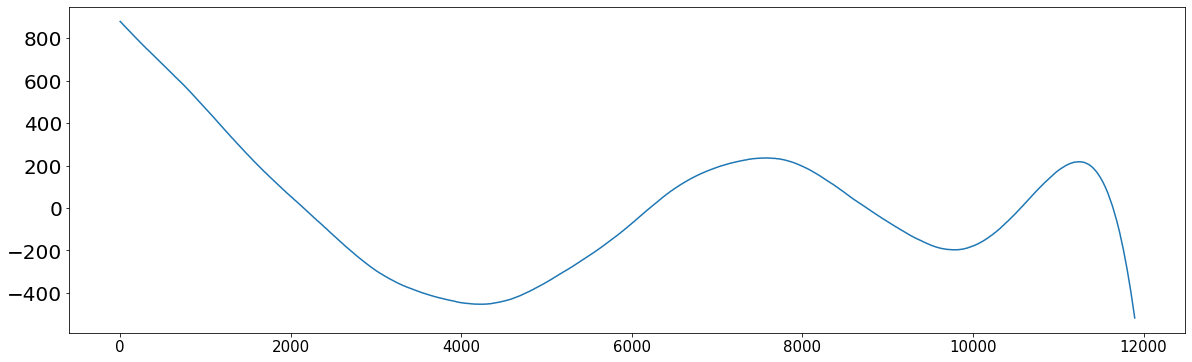

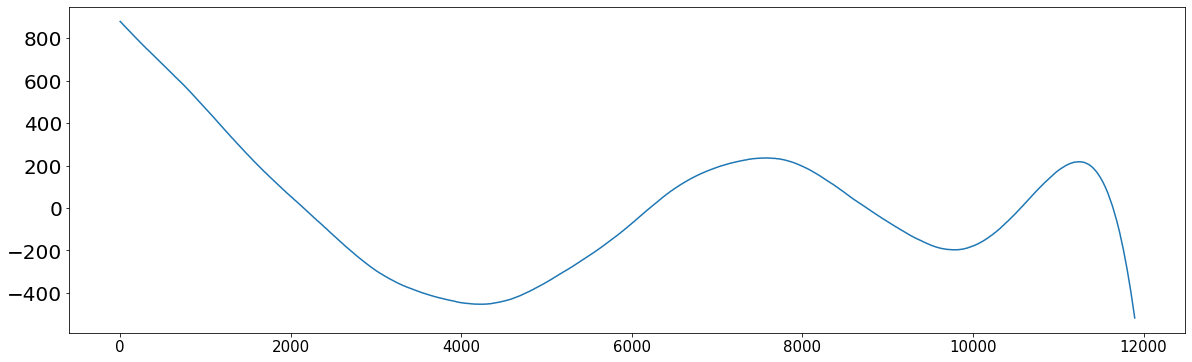

In [62]:
#polynomial regression-solar

import operator

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# transforming the data to include another axis
x_solar_polyreg, y_solar_polyreg = get_linreg_format(total_solar)
x_solar_polyreg = x_solar_polyreg[:, np.newaxis]
y_solar_polyreg = y_solar_polyreg[:, np.newaxis]

best_deg = None
best_r2 = -1
best_rmse = -1

for deg in range(10):
    polynomial_features= PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(x_solar_polyreg)

    model = LinearRegression()
    model.fit(x_poly, y_solar_polyreg)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y_solar_polyreg,y_poly_pred))
    r2 = r2_score(y_solar_polyreg,y_poly_pred)
    print('degree: ', deg)
    print('rmse= ',rmse)
    print('r2 = ',r2)
    
    if r2 > best_r2:
        best_r2 = r2
        best_rmse = rmse
        best_deg = deg
        
print('Best Degree: ', best_deg, '\n', 'Best R2: ', best_r2, '\n', 'Best RMSE: ', best_rmse)       
polynomial_features= PolynomialFeatures(degree=best_deg)
_poly = polynomial_features.fit_transform(x_solar_polyreg)

model = LinearRegression()
model.fit(x_poly, y_solar_polyreg)
y_poly_pred = model.predict(x_poly)

plt.scatter(x_solar_polyreg, y_solar_polyreg, s=5,color='blue')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_solar_polyreg,y_poly_pred), key=sort_axis)
x_solar_polyreg, y_poly_pred = zip(*sorted_zip)
plt.plot(x_solar_polyreg, y_poly_pred, color='red')
plt.title('solar eclipse polynomial regression')
plt.show()


#compute difference between predicted and actual
y_diff_solar_poly = y_poly_pred - y_solar_polyreg


#plots differnce between predicted and actual
_ = plt.plot(x_solar_polyreg, y_diff_solar_poly)
_ = plt.show()


### lunar

degree:  0
rmse=  1433.3401763860404
r2 =  0.0
degree:  1
rmse=  4.6722028949179455
r2 =  0.9999893746109737
degree:  2
rmse=  4.575598196138248
r2 =  0.9999898094596797
degree:  3
rmse=  4.530954067747334
r2 =  0.999990007347828
degree:  4
rmse=  4.410591212403532
r2 =  0.9999905311973035
degree:  5
rmse=  39.39553359996459
r2 =  0.9992445679158353
degree:  6
rmse=  99.63030570093905
r2 =  0.9951684733739952
degree:  7
rmse=  167.84587437753947
r2 =  0.9862873057372809
degree:  8
rmse=  236.6215627091716
r2 =  0.9727472653354313
degree:  9
rmse=  302.2151075998216
r2 =  0.9555436510257859
Best Degree:  4 
 Best R2:  0.9999905311973035 
 Best RMSE:  4.410591212403532


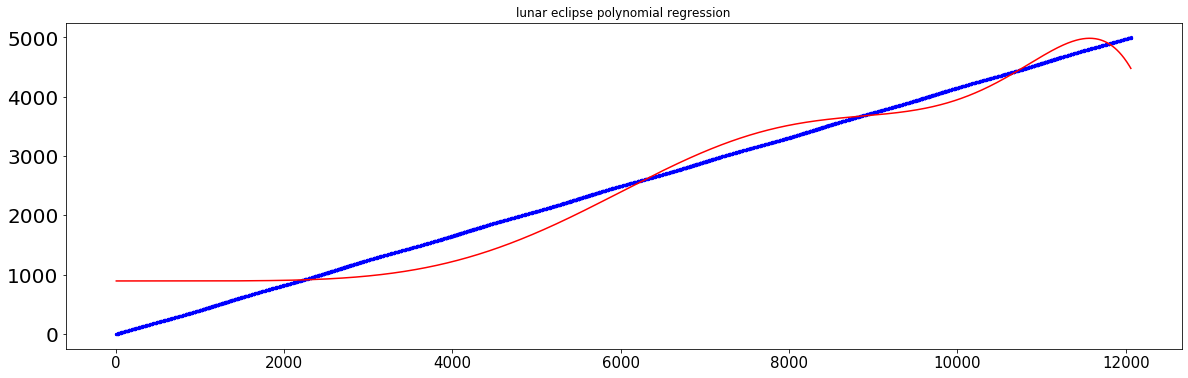

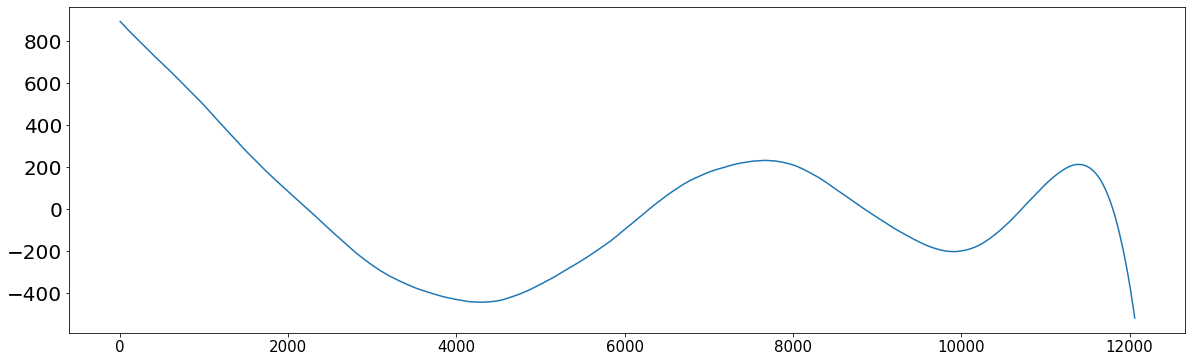

In [63]:
#poly regression- lunar

# transforming the data to include another axis
x_lunar_polyreg, y_lunar_polyreg = get_linreg_format(total_lunar)
x_lunar_polyreg = x_lunar_polyreg[:, np.newaxis]
y_lunar_polyreg = y_lunar_polyreg[:, np.newaxis]

for deg in range(10):
    polynomial_features= PolynomialFeatures(degree=deg)
    x_poly = polynomial_features.fit_transform(x_lunar_polyreg)

    model = LinearRegression()
    model.fit(x_poly, y_lunar_polyreg)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y_lunar_polyreg,y_poly_pred))
    r2 = r2_score(y_lunar_polyreg,y_poly_pred)
    print('degree: ', deg)
    print('rmse= ',rmse)
    print('r2 = ',r2)
    
    if r2 > best_r2:
        best_r2 = r2
        best_rmse = rmse
        best_deg = deg
        
print('Best Degree: ', best_deg, '\n', 'Best R2: ', best_r2, '\n', 'Best RMSE: ', best_rmse)       
polynomial_features= PolynomialFeatures(degree=best_deg)
_poly = polynomial_features.fit_transform(x_lunar_polyreg)

model = LinearRegression()
model.fit(x_poly, y_lunar_polyreg)
y_poly_pred = model.predict(x_poly)

plt.scatter(x_lunar_polyreg, y_lunar_polyreg, s=5,color='blue')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_lunar_polyreg,y_poly_pred), key=sort_axis)
x_lunar_polyreg, y_poly_pred = zip(*sorted_zip)
plt.plot(x_lunar_polyreg, y_poly_pred, color='red')
plt.title('lunar eclipse polynomial regression')
plt.show()

#compute difference between predicted and actual
y_diff_lunar_poly = y_poly_pred - y_lunar_polyreg


#plots differnce between predicted and actual
_ = plt.plot(x_lunar_polyreg, y_diff_lunar_poly)

## Ridge regression 

Results: solar rmse = 5.1 lunar rmse = 5.1

### solar

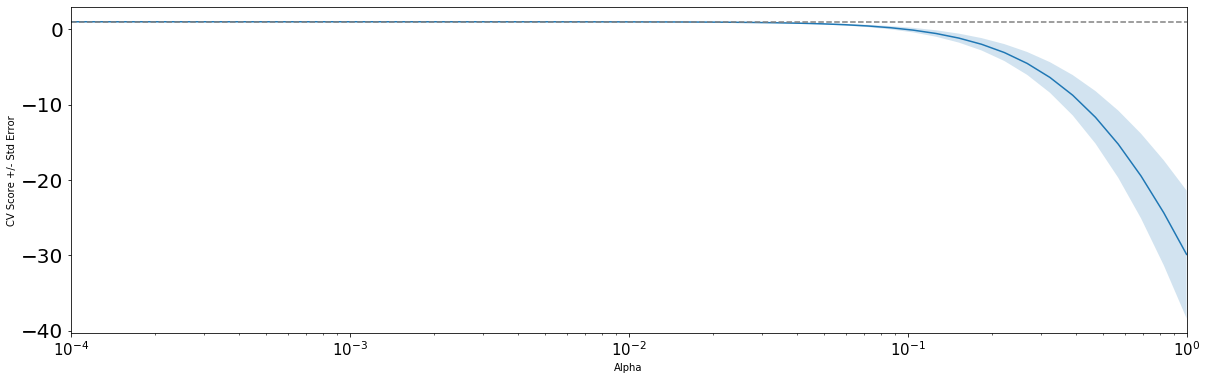

[0.9995532  0.99972995 0.99950038 0.99979156 0.99959201]
Root Mean Squared Error: 4.91566259808267


In [64]:
#ridge regression-solar
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

X, y = get_linreg_format(total_solar)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

    # Display the plot
display_plot(ridge_scores, ridge_scores_std)


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Create the regressor: reg_all
ridge = Ridge(alpha = .0001,normalize=True)

# Fit the regressor to the training data
ridge.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = ridge.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(ridge,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)



# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


### lunar

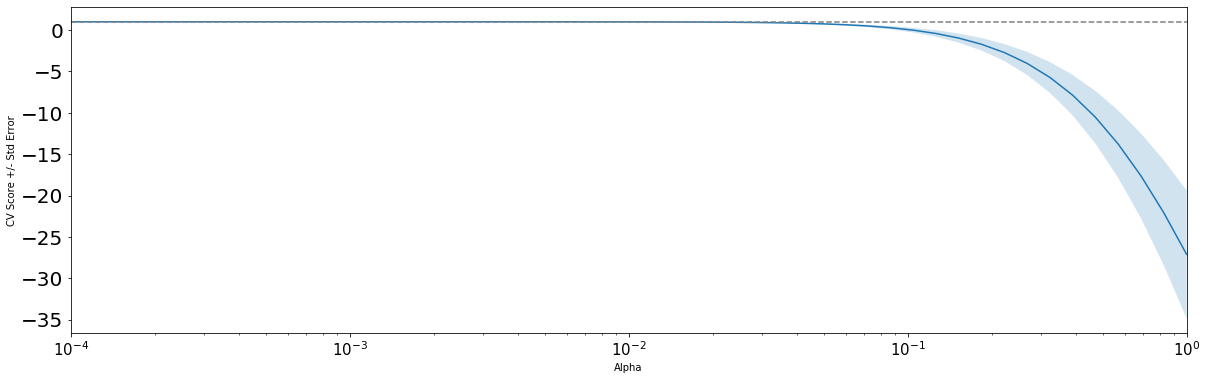

0.0001 	 0.9988657893970437
[0.99938511 0.99968353 0.99971629 0.99969778 0.99981734]
Root Mean Squared Error: 4.752759391892288


In [65]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

X, y = get_linreg_format(total_lunar)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

best_score = 0
best_alpha = -1

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    if np.mean(ridge_cv_scores) > best_score:
        best_score = np.mean(ridge_cv_scores)
        best_alpha = alpha
        
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

    # Display the plot
display_plot(ridge_scores, ridge_scores_std)
print(best_alpha, '\t', best_score)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Create the regressor: reg_all
ridge = Ridge(alpha = .0001,normalize=True)

# Fit the regressor to the training data
ridge.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = ridge.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(ridge,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)



# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


## Lasso Regression
results:  solar=4.9 lunar=4.7

### solar

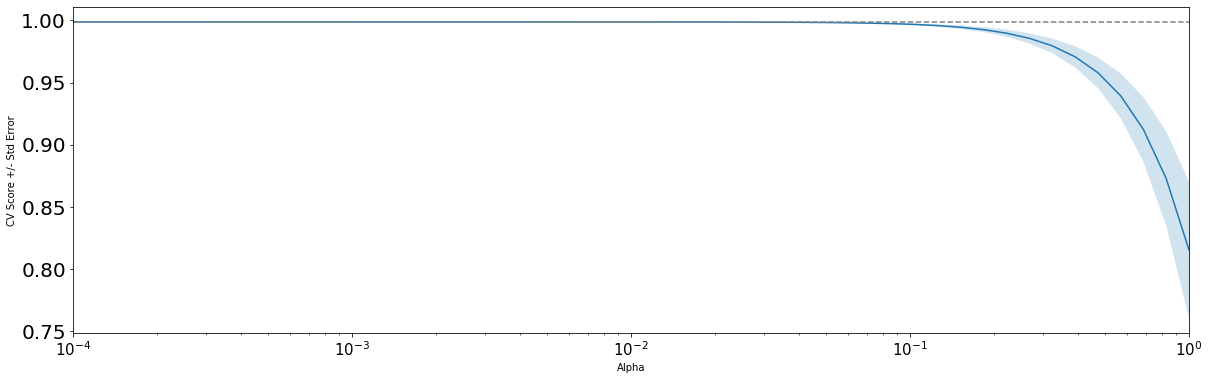

0.0001 	 0.9987106441384936
[0.99954043 0.99973038 0.99950133 0.99979202 0.99960541]
Root Mean Squared Error: 4.911157377106744


In [55]:
# Lasso regression - solar

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
lasso_scores = []
lasso_scores_std = []

X, y = get_linreg_format(total_solar)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create a lasso regressor: lasso
lasso = Lasso(normalize=True)

best_score = 0
best_alpha = -1

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: lasso.alpha
    lasso.alpha = alpha
    
    # Perform 10-fold CV: lasso_cv_scores
    lasso_cv_scores = cross_val_score(lasso, X, y, cv=10)
    if np.mean(lasso_cv_scores) > best_score:
        best_score = np.mean(lasso_cv_scores)
        best_alpha = alpha
        
    # Append the mean of lasso_cv_scores to lasso_scores
    lasso_scores.append(np.mean(lasso_cv_scores))
    
    # Append the std of lasso_cv_scores to lasso_scores_std
    lasso_scores_std.append(np.std(lasso_cv_scores))

    # Display the plot
display_plot(lasso_scores, lasso_scores_std)
print(best_alpha, '\t', best_score)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Create the regressor: reg_all
lasso = Lasso(alpha = .001,normalize=True)

# Fit the regressor to the training data
lasso.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = lasso.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lasso,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)



# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


### lunar

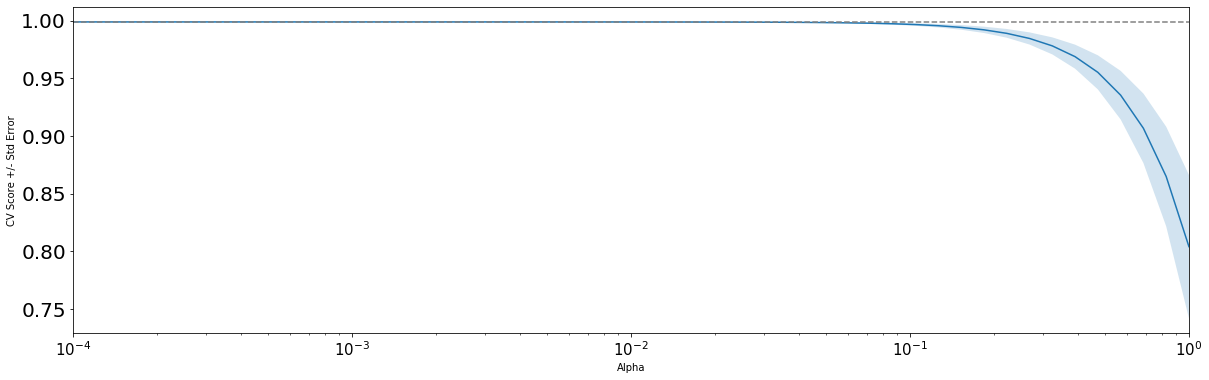

0.0001 	 0.9988692277092219
[0.99940233 0.99967778 0.99971624 0.99969349 0.99981676]
Root Mean Squared Error: 4.741338781783253


In [56]:
# Lasso regression - lunar

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
lasso_scores = []
lasso_scores_std = []

X, y = get_linreg_format(total_lunar)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

# Create a lasso regressor: lasso
lasso = Lasso(normalize=True)

best_score = 0
best_alpha = -1

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: lasso.alpha
    lasso.alpha = alpha
    
    # Perform 10-fold CV: lasso_cv_scores
    lasso_cv_scores = cross_val_score(lasso, X, y, cv=10)
    if np.mean(lasso_cv_scores) > best_score:
        best_score = np.mean(lasso_cv_scores)
        best_alpha = alpha
        
    # Append the mean of lasso_cv_scores to lasso_scores
    lasso_scores.append(np.mean(lasso_cv_scores))
    
    # Append the std of lasso_cv_scores to lasso_scores_std
    lasso_scores_std.append(np.std(lasso_cv_scores))

    # Display the plot
display_plot(lasso_scores, lasso_scores_std)
print(best_alpha, '\t', best_score)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Create the regressor: reg_all
lasso = Lasso(alpha = .001,normalize=True)

# Fit the regressor to the training data
lasso.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = lasso.predict(X_test)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(lasso,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)



# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


## Linear regression fittin diff with polyreg

solar=4.

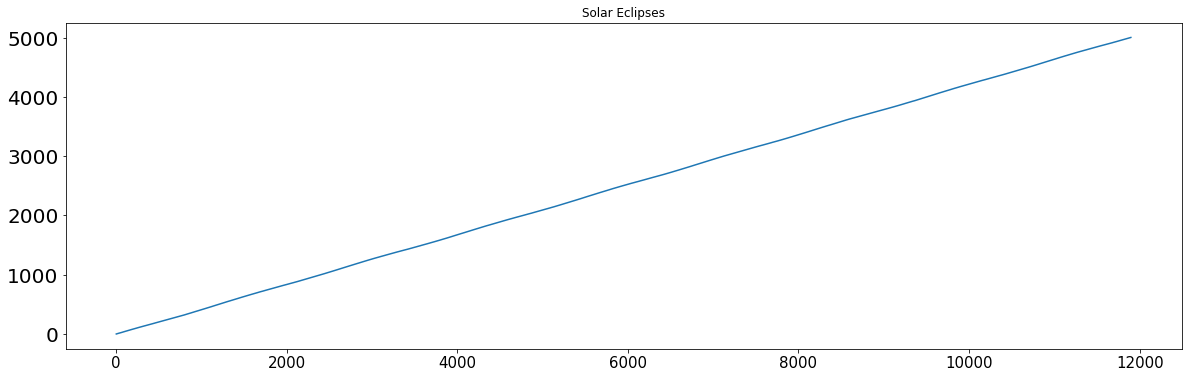

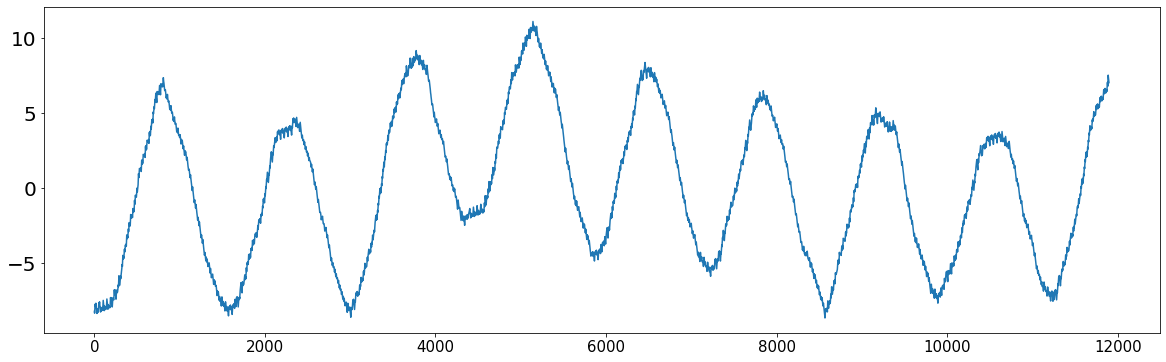

Root MSE:  4.939942254188271
MSE:  24.403029474714696


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#create Linear Regression model
lr_solar = LinearRegression()

#fit the model to the solar eclipse data
lr_solar.fit(x_solar.reshape(-1, 1), y_solar)

#predict the eclipses
y_predicted = lr_solar.predict(x_solar.reshape(-1, 1))

#compute difference between predicted and actual
y_diff = y_predicted - y_solar


#plots the predicted data with x:star index, and y:years from start date
_ = plt.plot(x_solar, y_solar)
_ = plt.title('Solar Eclipses')
_ = plt.show()
import math

#plots the difference between the predicted and actual
_ = plt.plot(x_solar, y_diff)
#cos_x = [-10 * math.cos(val/180) for val in x_solar]
#_ = plt.plot(x_solar, cos_x)
_ = plt.show()

print('Root MSE: ', np.sqrt(mean_squared_error(y_solar, y_predicted)))
print('MSE: ', mean_squared_error(y_solar, y_predicted))

#y_predicted_new = y_predicted - cos_x
#_ = plt.plot(x_solar, y_predicted_new)
#print('MSE: ', mean_squared_error(y_solar, y_predicted_new))


rmse=  4.82071260137855
r2 =  0.04768914002380675


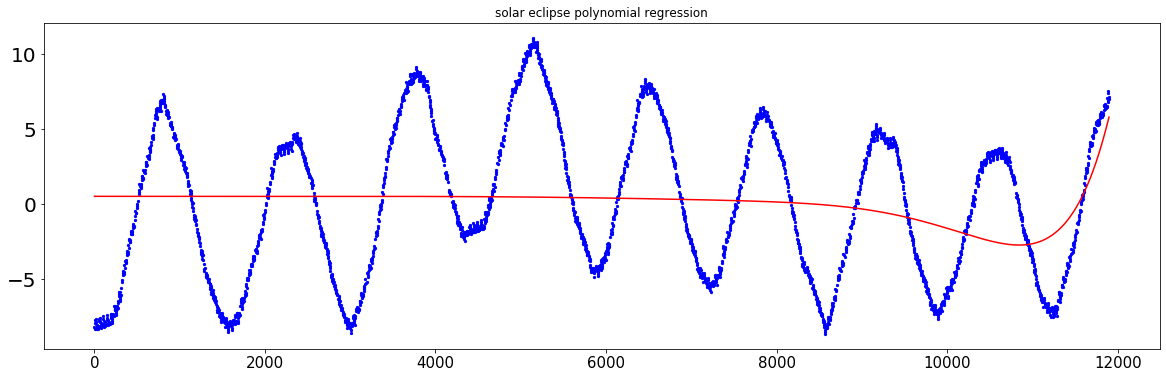

In [58]:
# transforming the data to include another axis
x_solar_poly = x_solar[:, np.newaxis]
y_diff_poly = y_diff[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=12)
x_poly = polynomial_features.fit_transform(x_solar_poly)

model = LinearRegression()
model.fit(x_poly, y_diff)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y_diff_poly,y_poly_pred))
r2 = r2_score(y_diff_poly,y_poly_pred)
print('rmse= ',rmse)
print('r2 = ',r2)

plt.scatter(x_solar_poly, y_diff_poly, s=5,color='blue')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_solar_polyreg,y_poly_pred), key=sort_axis)
x_solar, y_poly_pred = zip(*sorted_zip)
plt.plot(x_solar_poly, y_poly_pred, color='red')
plt.title('solar eclipse polynomial regression')
plt.show()


# # calculate new x's and y's
# x_new = np.linspace(x_solar[0], x_solar[-1], len(x_solar))
# y_new = f(x_new)

# plt.plot(x_solar, y_diff, 'o', x_new, y_new)
# plt.xlim([x_solar[0]-1, x_solar[-1] + 1 ])
# plt.show()

# y_predicted_new = y_predicted - y_new
# print('Root MSE: ',np.sqrt(mean_squared_error(y_solar, y_poly_pred)))
# print('MSE: ',mean_squared_error(y_solar, y_predicted_new))

## Bayesian Regression

results : solar=4.9 lunar=4.7

In [59]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

X, y = get_linreg_format(total_solar)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

bayesReg = linear_model.BayesianRidge()
parameters = {'alpha_1': np.logspace(-7, 0, 10), 'alpha_2': np.logspace(-7, 0, 10), 'lambda_1': np.logspace(-7, 0, 10), 'lambda_2': np.logspace(-7, 0, 10)}

clf = GridSearchCV(bayesReg, parameters, cv = 5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Fit the regressor to the training data
clf.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = clf.predict(X_test)

# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


Root Mean Squared Error: 4.909638987202373


In [60]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

X, y = get_linreg_format(total_lunar)

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

bayesReg = linear_model.BayesianRidge()
parameters = {'alpha_1': np.logspace(-7, 0, 10), 'alpha_2': np.logspace(-7, 0, 10), 'lambda_1': np.logspace(-7, 0, 10), 'lambda_2': np.logspace(-7, 0, 10)}

clf = GridSearchCV(bayesReg, parameters, cv = 5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Fit the regressor to the training data
clf.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = clf.predict(X_test)

# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


Root Mean Squared Error: 4.735729177532251


------------------------------------THE END------------------------------------